:Fazer 3 gráficos diferentes, calcular todas medidas (centralidade e dispersão), 3 probabilidades e 3 probabilidades com as distribuições de probabilidades discretas.
Com as informações obtidas, tirar uma conclusão sobre os resultados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom, poisson

df = pd.read_csv('./Cópia de japan_heart_attack_dataset.csv')

In [4]:
df_female = df[df['Gender']=='Female']
n_female=df_female.shape[0]
P_M =df_female.shape[0]/df.shape[0]
print(f"A probabilidade da pessoa ser mulher é P(M)={P_M: .2f}")

P_H= 1-P_M
print(f"A probabilidade de ser um homem é P(H)={P_H: .2f}")



df_region_urban = df[df['Region']=='Urban']
n_urban = df_region_urban.shape[0]
P_URBAN = df_region_urban.shape[0]/df.shape[0]
print(f"A probabilidade da pessoa morar na região urbana é ={P_URBAN: .2f}")

P_RURAL= 1-P_URBAN
print(f"A probabilidade da pessoa nascer em uma zona rural é {P_RURAL: .2f}")

A probabilidade da pessoa ser mulher é P(M)= 0.50
A probabilidade de ser um homem é P(H)= 0.50
A probabilidade da pessoa morar na região urbana é = 0.70
A probabilidade da pessoa nascer em uma zona rural é  0.30


C:\Users\mathe\AppData\Local\Temp\ipykernel_19884\3443541994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


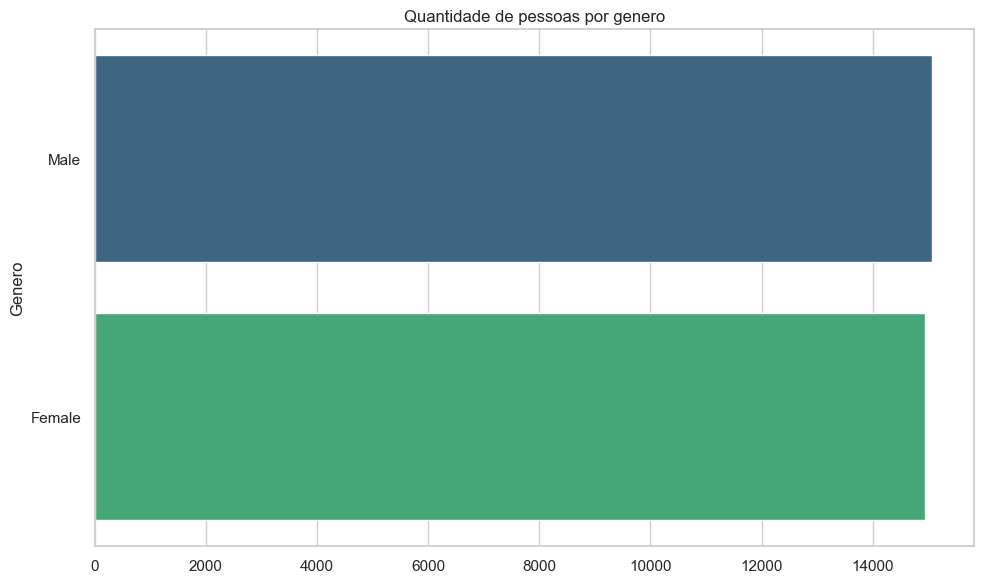

In [5]:

sns.set(style="whitegrid")

# 1. Gráfico de Barras - Países de Origem
country_counts = df['Gender'][(df['Gender'] != '') & (df['Gender'].notnull())].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title('Quantidade de pessoas por genero')
plt.xlabel('')
plt.ylabel('Genero')
plt.tight_layout()
plt.show()


C:\Users\mathe\AppData\Local\Temp\ipykernel_19884\4196454245.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="rocket") # Eixos Invertidos


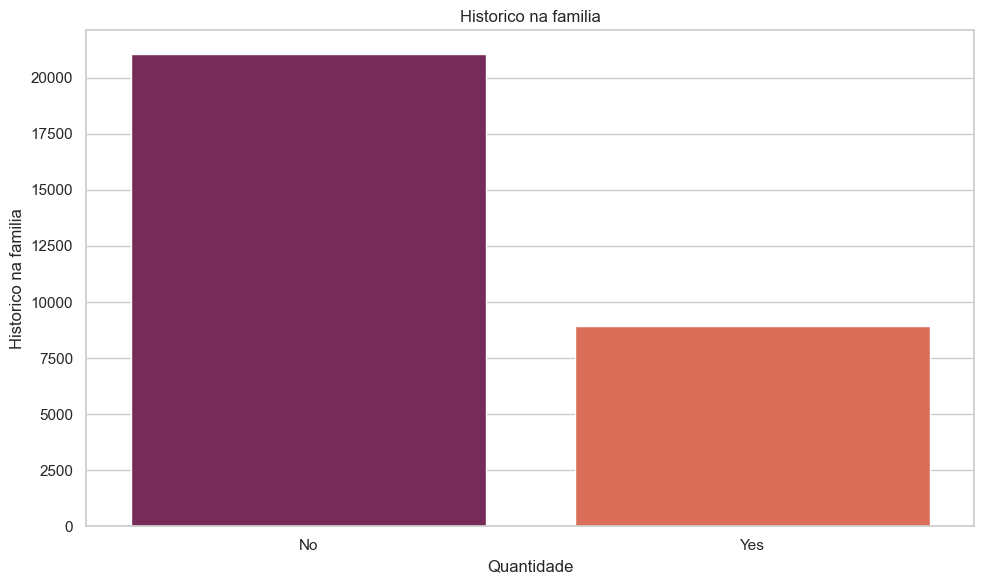

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame seja chamado 'df'

language_counts = df['Family_History'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="rocket") # Eixos Invertidos
plt.title('Historico na familia')
plt.xlabel('Quantidade') # Invertidos
plt.ylabel('Historico na familia') # Invertidos
plt.tight_layout()
plt.show()

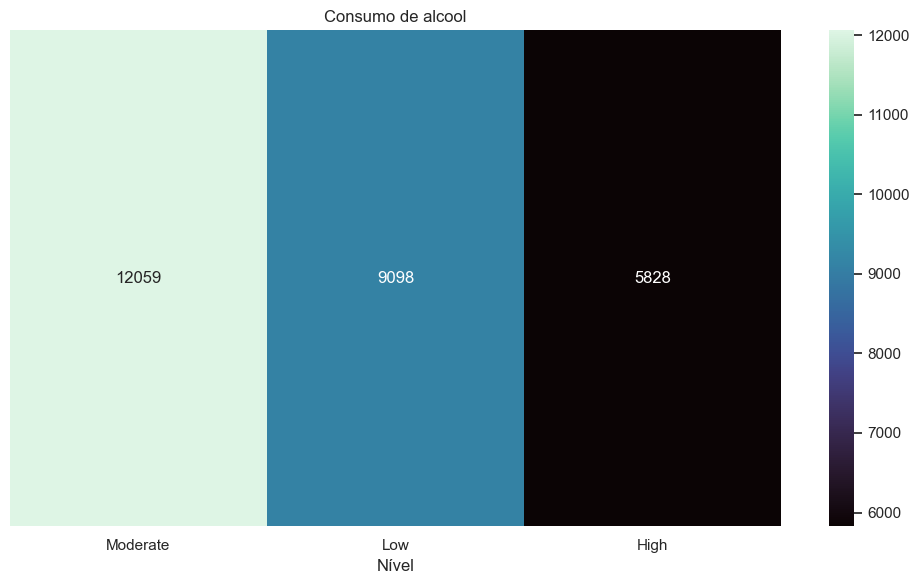

In [7]:
filming_counts = df['Alcohol_Consumption'][(df['Alcohol_Consumption']!= '') & (df['Alcohol_Consumption'].notnull())].value_counts()

# Criar uma matriz para o mapa de calor
filming_matrix = filming_counts.values.reshape(1, -1)

plt.figure(figsize=(10, 6))
sns.heatmap(filming_matrix, annot=True, fmt="d", cmap="mako", xticklabels=filming_counts.index, yticklabels=False)
plt.title('Consumo de alcool')
plt.xlabel('Nível')
plt.ylabel('')  # Remover o rótulo do eixo y
plt.tight_layout()
plt.show()


# Distribuições Discretas


Poison

In [8]:
# Contar número total de ataques cardíacos
total_ataques = df["Heart_Attack_Occurrence"].value_counts().get("Yes", 0)

# Definir o tamanho do grupo de pacientes
grupo_pacientes = 50

# Calcular lambda (média de ataques cardíacos por grupo de 50 pacientes)
lambda_poisson = total_ataques / (len(df) / grupo_pacientes)

# Definir um valor de k (exemplo: probabilidade de exatamente 2 ataques cardíacos no grupo)
k_poisson = 2

# Calcular a probabilidade usando a distribuição de Poisson
prob_poisson = poisson.pmf(k_poisson, lambda_poisson)

print(f"Média esperada de ataques cardíacos por grupo de {grupo_pacientes} pacientes: {lambda_poisson:.4f}")
print(f"Probabilidade de exatamente {k_poisson} ataques cardíacos no grupo: {prob_poisson:.4f}")

Média esperada de ataques cardíacos por grupo de 50 pacientes: 4.9400
Probabilidade de exatamente 2 ataques cardíacos no grupo: 0.0873


Binomial

In [9]:
# Definir o total de pacientes analisados (n)
n = 10  # Exemplo: 10 pacientes escolhidos aleatoriamente

# Calcular a probabilidade de ataque cardíaco no dataset
p = df["Heart_Attack_Occurrence"].value_counts(normalize=True).get("Yes", 0)

# Definir k (exemplo: probabilidade de exatamente 3 ataques cardíacos entre os 10 pacientes)
k_binomial = 3

# Calcular a probabilidade binomial
prob_binomial = binom.pmf(k_binomial, n, p)

print(f"Probabilidade de exatamente {k_binomial} ataques cardíacos em um grupo de {n} pacientes: {prob_binomial:.4f}")


Probabilidade de exatamente 3 ataques cardíacos em um grupo de 10 pacientes: 0.0559


Uniforme Discreta

In [10]:
# Definir os limites mínimo e máximo da variável escolhida (ex: Idade)
min_idade = df["Age"].min()
max_idade = df["Age"].max()

# Calcular o número total de valores possíveis
n_valores = max_idade - min_idade + 1

# Escolher um valor específico (exemplo: qual a probabilidade de um paciente ter exatamente 50 anos?)
k_uniforme = 50

# Calcular a probabilidade da distribuição uniforme discreta
prob_uniforme = 1 / n_valores if min_idade <= k_uniforme <= max_idade else 0

print(f"Probabilidade de um paciente ter exatamente {k_uniforme} anos: {prob_uniforme:.4f}")

Probabilidade de um paciente ter exatamente 50 anos: 0.0161
